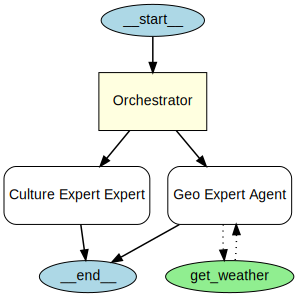

In [4]:
from agents import Agent, Runner, SQLiteSession, function_tool
from agents.extensions.visualization import draw_graph
from pydantic import BaseModel

session = SQLiteSession(session_id="user_2", db_path="ai-memory.db")


class Answer(BaseModel):
    answer: str
    background_explanation: str


@function_tool
def get_weather():
    return "30 degrees"


cultural_agent = Agent(
    name="Culture Expert Expert",
    instructions="You are a cultural expert. You answer questions related to culture.",
    handoff_description="Use this for questions related to culture.",
)

geaography_agent = Agent(
    name="Geo Expert Agent",
    instructions="You are a expert in geography, you answer questions related to them.",
    handoff_description="Use this to answer geography related questions.",
    tools=[get_weather],
    output_type=Answer,
)


main_orchestrator = Agent(
    name="Orchestrator",
    instructions="You are a user-facing agent. Route the user's question to the agent best suited to answer it.",
    handoffs=[cultural_agent, geaography_agent],
    model="gpt-5.1",
)

draw_graph(main_orchestrator)

In [ ]:
result = await Runner.run(
    main_orchestrator,
    "What is the capital of Thailand's northen province.",
    session=session,
)

print(result.last_agent.name)
print(result.final_output)

OPENAI_API_KEY is not set, skipping trace export


Geo Expert Agent
answer="The capital of Thailand's northernmost province, Chiang Rai, is the city of Chiang Rai itself. It serves as the administrative and cultural center of the province and is known for its distinctive temples and proximity to the Golden Triangle region." background_explanation="Thailand's northern region has several provinces, but Chiang Rai is the northernmost. The capital city of each Thai province typically shares its name with the province. Chiang Rai city is a well-known destination famous for landmarks such as Wat Rong Khun (the White Temple) and its role in Northern Thai history and culture. This convention of naming provides clarity and ease in administrative and geographic identification across Thailand."


OPENAI_API_KEY is not set, skipping trace export
